<a href="https://colab.research.google.com/github/Re4lmarc/Machine-Learning-Fundamental-Dicoding/blob/master/Proyek_Dicoding_Machine_Learning_Fundamental_Sub1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Library

In [0]:
import numpy as np
import pandas as pd
import glob
from keras.models import model_from_json
from IPython.display import Image, display
from tensorflow.keras.models import Sequential
from keras.preprocessing import image
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.callbacks import EarlyStopping
# from learntools.deep_learning.decode_predictions import decode_predictions
from sklearn.model_selection import train_test_split
from tensorflow import keras
from os.path import join
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from google.colab import files
%matplotlib inline

Using TensorFlow backend.


In [0]:
paper_images = glob.glob('/content/drive/My Drive/Projek Dicoding/rockpaperscissors/paper/*')
scissor_images = glob.glob('/content/drive/My Drive/Projek Dicoding/rockpaperscissors/scissors/*')
rock_images = glob.glob('/content/drive/My Drive/Projek Dicoding/rockpaperscissors/rock/*')

images_path = paper_images + scissor_images + rock_images

In [0]:
img_height = 200
img_width = 300

## Image Data Generator

In [0]:
df_paper_images = pd.DataFrame({'class' : 'paper', 'file' : paper_images})
df_scissor_images = pd.DataFrame({'class' : 'scissors', 'file' : scissor_images})
df_rock_images = pd.DataFrame({'class' : 'rock', 'file' : rock_images})

df_join_all = pd.concat([df_paper_images, df_scissor_images, df_rock_images], ignore_index=True)

In [0]:
X_train, X_val, y_train, y_val = train_test_split(df_join_all['file'], df_join_all['class'], test_size = 0.2, stratify=df_join_all['class'])

In [0]:
df_train = pd.DataFrame({'file' : X_train, 'class' : y_train})
df_val = pd.DataFrame({'file' : X_val, 'class' : y_val})

In [0]:
batch_size = 50
epochs = 25

train_image_generator = ImageDataGenerator(rescale=1./255)
valid_image_generator =  ImageDataGenerator(rescale=1./255)

In [0]:
generated_training_data = train_image_generator.flow_from_dataframe(df_train,
                                                           batch_size=batch_size,
                                                           x_col="file",
                                                           y_col="class",
                                                           rotation_range=10,
                                                           zoom_range = 0.1, 
                                                           horizontal_flip=True,
                                                           vertical_flip=True,
                                                           width_shift_range=0.1,
                                                           height_shift_range=0.1,
                                                           shuffle=True,
                                                           target_size=(img_height, img_width),
                                                           class_mode='categorical')

Found 1750 validated image filenames belonging to 3 classes.


In [0]:
generated_validation_data = train_image_generator.flow_from_dataframe(df_val,
                                                          batch_size=batch_size,
                                                          x_col="file",
                                                          y_col="class",
                                                          shuffle=True,
                                                          rotation_range=10,
                                                          zoom_range = 0.1,
                                                          horizontal_flip=True,
                                                          vertical_flip=True,
                                                         width_shift_range=0.1,
                                                         height_shift_range=0.1, 
                                                         target_size=(img_height, img_width),
                                                         class_mode='categorical')

Found 438 validated image filenames belonging to 3 classes.


In [0]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(30,30))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Contoh Gambar Training


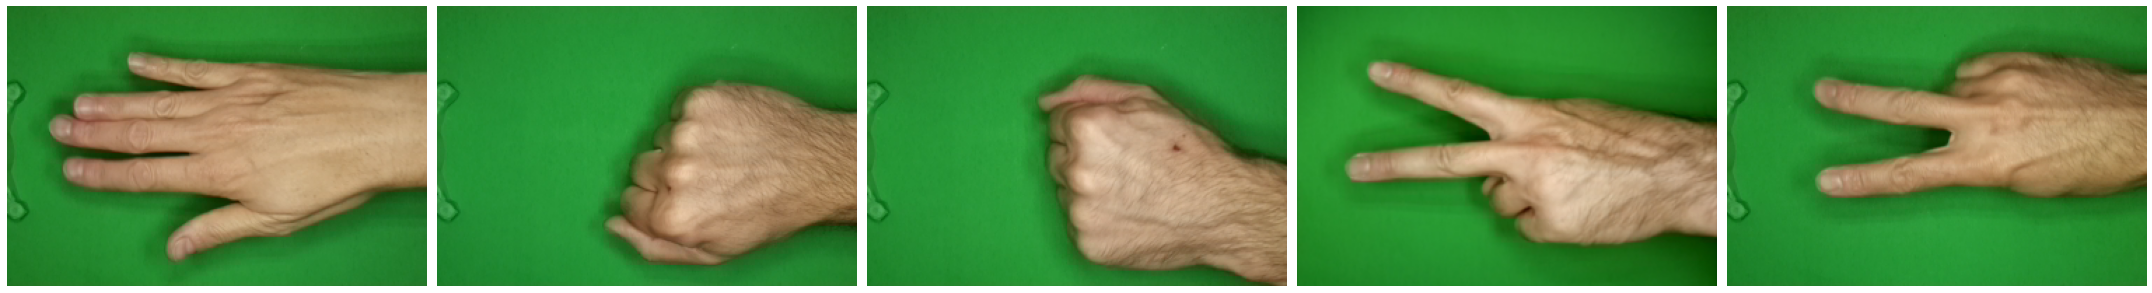


Contoh Gambar Validasi


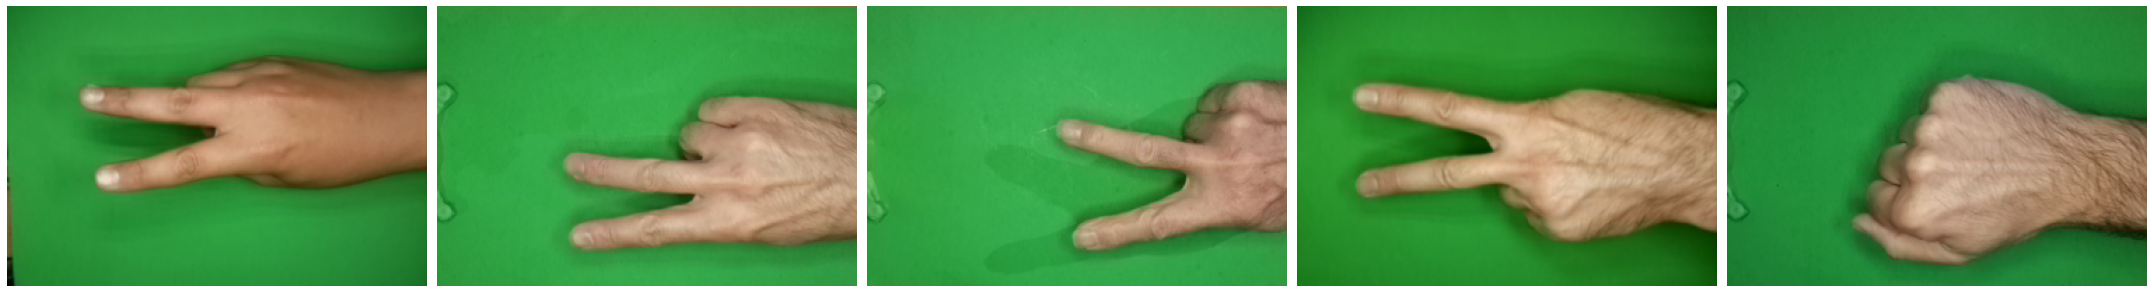

In [0]:
sample_training_images, _ = next(generated_training_data)
sample_validation_images, _ = next(generated_validation_data)
print("Contoh Gambar Training")
plotImages(sample_training_images[:5])
print()
print("Contoh Gambar Validasi")
plotImages(sample_validation_images[:5])

In [0]:
# V1 Accuracy 97%
# V1+image aug 99 Train, 98,86 Test
model = Sequential([
    Conv2D(filters = 16, kernel_size = (3,3), activation='relu', input_shape=(img_height, img_width , 3)),
    MaxPooling2D(pool_size=(3,3)),
    Conv2D(filters = 32, kernel_size = (3,3), activation='relu'),
    # Conv2D(filters = 32, kernel_size = (3,3), activation='relu'),
    MaxPooling2D(pool_size=(3,3)),
    Dropout(0.1),
    Conv2D(filters = 64, kernel_size = (3,3), activation='relu'),
    # Conv2D(filters = 64, kernel_size = (3,3), activation='relu'),
    MaxPooling2D(pool_size=(3,3)),
    Dropout(0.25),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(3, activation='softmax')
])

In [0]:
earlystopper = EarlyStopping(
    monitor = 'val_loss',
    patience = 3,
    verbose = 1,
    min_delta = 0,
    mode = 'auto'
)

callbacks = earlystopper

In [0]:
 model.compile(optimizer='adam',
              loss=keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

In [0]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 198, 298, 16)      448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 66, 99, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 64, 97, 32)        4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 21, 32, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 21, 32, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 19, 30, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 6, 10, 64)        

In [0]:
history = model.fit(
    generated_training_data,
    # steps_per_epoch=128,
    epochs=epochs,
    validation_data=generated_validation_data,
    # validation_steps=128
    callbacks=callbacks
)

Epoch 1/25
35/35 [==============================] - 9s 246ms/step - loss: 1.0433 - accuracy: 0.4703 - val_loss: 0.6505 - val_accuracy: 0.8356
Epoch 2/25
35/35 [==============================] - 9s 244ms/step - loss: 0.4206 - accuracy: 0.8509 - val_loss: 0.2118 - val_accuracy: 0.9132
Epoch 3/25
35/35 [==============================] - 9s 245ms/step - loss: 0.1790 - accuracy: 0.9366 - val_loss: 0.1326 - val_accuracy: 0.9543
Epoch 4/25
35/35 [==============================] - 9s 245ms/step - loss: 0.1097 - accuracy: 0.9634 - val_loss: 0.1234 - val_accuracy: 0.9589
Epoch 5/25
35/35 [==============================] - 9s 258ms/step - loss: 0.0739 - accuracy: 0.9743 - val_loss: 0.0966 - val_accuracy: 0.9749
Epoch 6/25
35/35 [==============================] - 9s 246ms/step - loss: 0.0589 - accuracy: 0.9817 - val_loss: 0.1040 - val_accuracy: 0.9703
Epoch 7/25
35/35 [==============================] - 8s 239ms/step - loss: 0.0431 - accuracy: 0.9869 - val_loss: 0.1076 - val_accuracy: 0.9703
Epoch 

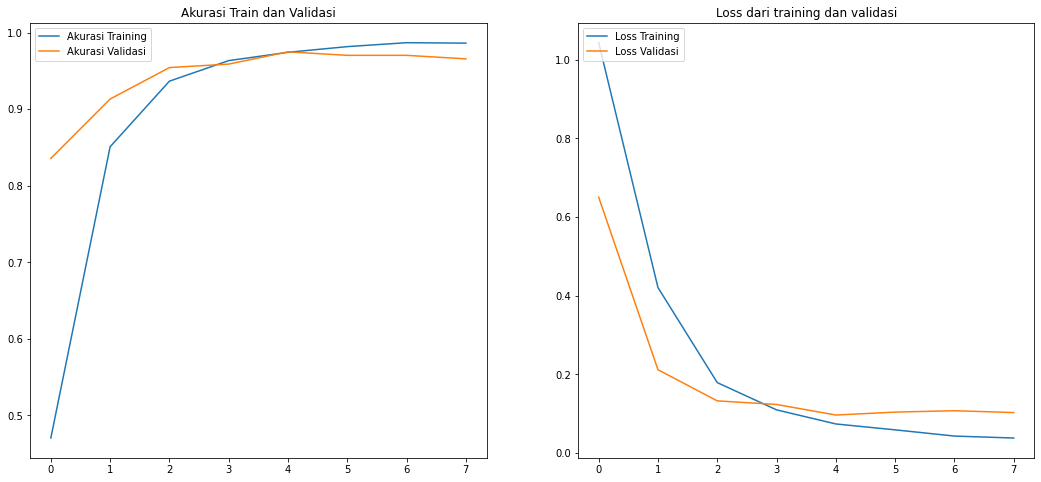

In [0]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(len(history.history['val_loss']))

plt.figure(figsize=(18, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Akurasi Training')
plt.plot(epochs_range, val_acc, label='Akurasi Validasi')
plt.legend(loc='upper left')
plt.title('Akurasi Train dan Validasi')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Loss Training')
plt.plot(epochs_range, val_loss, label='Loss Validasi')
plt.legend(loc='upper left')
plt.title('Loss dari training dan validasi')
plt.show()

Saving imageedit_8_2854908907.jpg to imageedit_8_2854908907 (23).jpg
Saving imageedit_5_8110931533.jpg to imageedit_5_8110931533 (24).jpg
Saving imageedit_2_2243909827.jpg to imageedit_2_2243909827 (24).jpg
imageedit_8_2854908907.jpg
batu
imageedit_5_8110931533.jpg
kertas
imageedit_2_2243909827.jpg
kertas


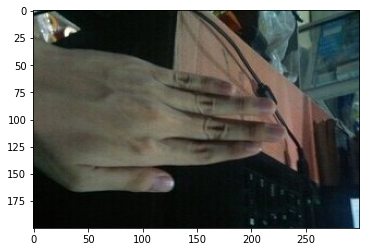

In [0]:
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(img_height,img_width))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  if classes[0][0]==1:
    print('kertas')
  elif classes[0][1]==1:
    print('batu')
  else:
    print('gunting')